In [1]:
from win32com.client.gencache import EnsureDispatch, EnsureModule
from win32com.client import CastTo, constants
import PythonStandaloneApplication4
TheApp = PythonStandaloneApplication4.PythonStandaloneApplication4()

In [2]:
#TheApp.TheSystem.LoadFile("D:\Antipa\Zemax\halfdeg_GRIN_grintech_Python.zmx",0)
TheApp.TheSystem.LoadFile("D:/Antipa/Zemax/uniformLenslets_GRIN_grintech_Python_full.zmx",0)
#TheApp.TheSystem.LoadFile("D:/Antipa/Zemax/halfdeg_full_GRIN_grintech.zmx",0)
#TheApp.TheSystem.LoadFile("D:\Antipa\Zemax\halfdeg_GRIN_grintech_Python.zmx")

True

In [3]:
TheApplication = TheApp.TheConnection.ConnectAsExtension(1)

In [4]:
#TheApplication.LoadNewSystem("D:\Antipa\Zemax\halfdeg_GRIN_grintech_Python.zmx")

In [5]:
TheSystem = TheApplication.GetSystemAt(0)

In [6]:
TheLDE = TheSystem.LDE
TheSystemData = TheSystem.SystemData

In [7]:
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import numpy as np


s0 = TheLDE.GetSurfaceAt(0)
s0.Thickness = 0;

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
(10,)


<IPython.core.display.Javascript object>


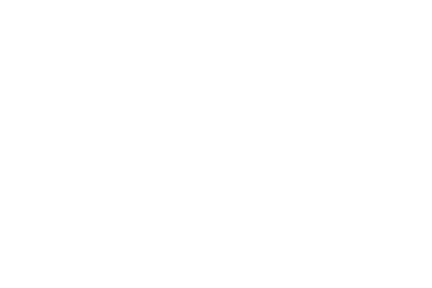


Field: 0.000, Z: 0.050 (micron)
Field 1 of 1
Depth 1 of 10

Field: 0.000, Z: 0.100 (micron)
Field 1 of 1
Depth 2 of 10

Field: 0.000, Z: 0.150 (micron)
Field 1 of 1
Depth 3 of 10

Field: 0.000, Z: 0.200 (micron)
Field 1 of 1
Depth 4 of 10

Field: 0.000, Z: 0.250 (micron)
Field 1 of 1
Depth 5 of 10

Field: 0.000, Z: 0.300 (micron)
Field 1 of 1
Depth 6 of 10

Field: 0.000, Z: 0.350 (micron)
Field 1 of 1
Depth 7 of 10

Field: 0.000, Z: 0.400 (micron)
Field 1 of 1
Depth 8 of 10

Field: 0.000, Z: 0.450 (micron)
Field 1 of 1
Depth 9 of 10

Field: 0.000, Z: 0.500 (micron)
Field 1 of 1
Depth 10 of 10


<IPython.core.display.Javascript object>


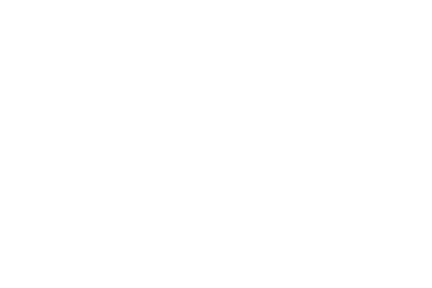

In [17]:
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import numpy as np
%matplotlib notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from IPython import display


s0 = TheLDE.GetSurfaceAt(0)
s0.Thickness = 0;

s1 = TheLDE.GetSurfaceAt(1)

#s1_pop = s1.PhysicalOpticsData
#s1_pop.ResampleAfterRefraction = False
#s1_pop.AutoResample = False

s3 = TheLDE.GetSurfaceAt(3)
TheSystem.Save()
field_list = np.linspace(0, .6, num=1)
#field_list = [0.0]
nz = 10;
dz = .00001;
z_list_main = np.linspace(.05,.5, num = nz)
#z_list_main = np.linspace(.05,.05,num=1)
#z_list_main = .3625;
zfisher = False
if zfisher:
    z_list = np.zeros(nz*2)
    z_list[::2]=z_list_main;
    z_list[1::2]=z_list_main+dz
else:
    z_list = z_list_main
    
print(z_list)
print(np.shape(z_list))
TheSystemData.Fields.SetVignetting    
findex = 0;
ims = []
imdata = []
dx = []
sindex = 0;
fig5 = plt.figure()
for f1 in field_list:
    findex = findex + 1
    for s1z in z_list:
        s1.Thickness = s1z
        sindex = sindex + 1
        
        Field1 = TheSystemData.Fields.GetField(1)
        Field1.Y = f1;
        TheSystemData.Fields.SetVignetting
        pop = TheSystem.Analyses.New_Analysis_SettingsFirst(constants.AnalysisIDM_PhysicalOpticsPropagation)
        pop.Terminate()
        pop_setting = pop.GetSettings()
        pop_settings = CastTo(pop_setting, 'IAS_')
 
        if pop.HasAnalysisSpecificSettings == False:
            cfg = TheApplication.ZemaxDataDir + '\\CustomConfigs\\POP.CFG'
            #cfg = "C:\\Users\\Nick\\My Documents\\Test.CFG"
            #pop_settings.ModifySettings(cfg, 'POP_END', (TheLDE.NumberOfSurfaces-1))
            pop_settings.ModifySettings(cfg, 'POP_END',10)

            pop_settings.ModifySettings(cfg, 'POP_BEAMTYPE', 0)
            pop_settings.ModifySettings(cfg, 'POP_START', 1)
            #pop_settings.ModifySettings(cfg, 'POP_END', TheLDE.Number)
            pop_settings.ModifySettings(cfg, 'POP_SAMPX',6)
            pop_settings.ModifySettings(cfg, 'POP_SAMPY',6)
            pop_settings.ModifySettings(cfg, 'POP_FIELD',1)
            pop_settings.ModifySettings(cfg, 'POP_PARAM1', 5e-6)    # Waist X
            pop_settings.ModifySettings(cfg, 'POP_PARAM2', 5e-6)    # Waist Y
            pop_settings.ModifySettings(cfg, 'POP_WIDEX', .500)
            pop_settings.ModifySettings(cfg, 'POP_WIDEY', .500)
            #pop_settings.ModifySettings(cfg, 'POP_AUTO', 1)          # needs to go after POP_PARAM

            pop_settings.LoadFrom(cfg)
            
        pop.ApplyAndWaitForCompletion()

        PopResults = pop.GetResults()
        PopRes = CastTo(PopResults, 'IAR_')
        PopGrid = PopRes.GetDataGrid(0)
        print("")
        print("Field: {:.3f}, Z: {:.3f} (micron)".format(f1,s1z))
        print("Field {:d} of {:d}".format(findex,field_list.shape[0]))
        print("Depth {:d} of {:d}".format(sindex,z_list.shape[0]))

        imdata.append(PopGrid.Values)
        dx.append(PopGrid.X(0))
        im = plt.imshow(PopGrid.Values, interpolation='nearest', animated=True)
        plt.clim(0, np.percentile(PopGrid.Values, 99))
        ims.append([im])
        pop.Close()
#         plt.clf()
#         plt.imshow(PopGrid.Values)
#         display.display(fig5)
#         display.clear_output(wait=True)

TheSystem.Save()


In [27]:
print(dx)

print(cfg)



[-0.9648285992720362, -0.9643634262026118, -0.9638982529331127, -0.9634330800276586, -0.9629679066768251, -0.9625027363881778, -0.9620375630945297, -0.9615723922869619, -0.9611072200539839, -0.9606420499673263, -0.9601768776070948, -0.9597117076884351, -0.9592465365231839, -0.958781366086397, -0.9583161965568529, -0.9578510275209103, -0.9573858578514088, -0.9569206894132595, -0.9564555210170296, -0.9559903532272225, -0.9555251847303514, -0.9550600175716407, -0.9545948498087108, -0.9541296826971403, -0.9536645160891863, -0.9531993496693115, -0.9527341836282085, -0.9522690187259885, -0.9518038527265534, -0.9513386872350377, -0.9508735226193467, -0.9504083588101664, -0.9499431953187936, -0.9494780312655631, -0.9490128679752057, -0.948547705869722, -0.948082543124232, -0.9476173808508525, -0.9471522189881267, -0.9466870571124223, -0.9462218966919321, -0.945756736722057, -0.9452915757545485, -0.9448264168343693, -0.9443612571049426, -0.943896098517441, -0.9434309396245869, -0.94296578136218

In [18]:
# Convert image stack to array and normalize
NPhotons = 5e3;
for n in range(len(imdata)):
    imdata[n] = imdata[n]/np.sum(imdata[n])*NPhotons;
imdata_array = np.asarray(imdata)
print(imdata_array.shape)

(10, 512, 512)


In [29]:



if zfisher:
    print(np.sum(imdata_array[0,:,:]))
    imdata_diff = imdata_array[1::2]-imdata_array[::2]
    print(imdata_diff.shape)
    #fig = plt.figure(figsize=(20,20))
    #plt.imshow(imdata_diff[0,:,:]**2)
    #plt.clim(0, np.percentile(imdata_diff**2, 99.99))
    fi = np.zeros(imdata_diff.shape[0])
    fiim = (imdata_diff/dz/1e-3)**2/(imdata_array[::2,:,:]+1e-12)
    imind = 0
    #plt.imshow(fiim[imind,:,:])
    #plt.clim([0, np.percentile(fiim[imind,:,:], 99)])
    print(imdata_diff.shape)
    for n in range(imdata_diff.shape[0]):
        fi[n] = np.sum(fiim[n,:,:])

    fig2 = plt.figure(figsize = [16,5])
    plt.scatter(z_list_main,fi)
    #plt.ylim((1e13, 2e17))
    plt.title('Z fisher info vs z, half degree diffuser')
    plt.xlabel('z, microns')
    plt.ylabel('Fisher information')
    mx = np.max(fi)
    print(mx)
    fi == mx
    z_list_main[9]
    plt.savefig('D:\Antipa\Zemax\Python\MiniscopePlots\Fisher_halfdeg_z.png')

<IPython.core.display.Javascript object>


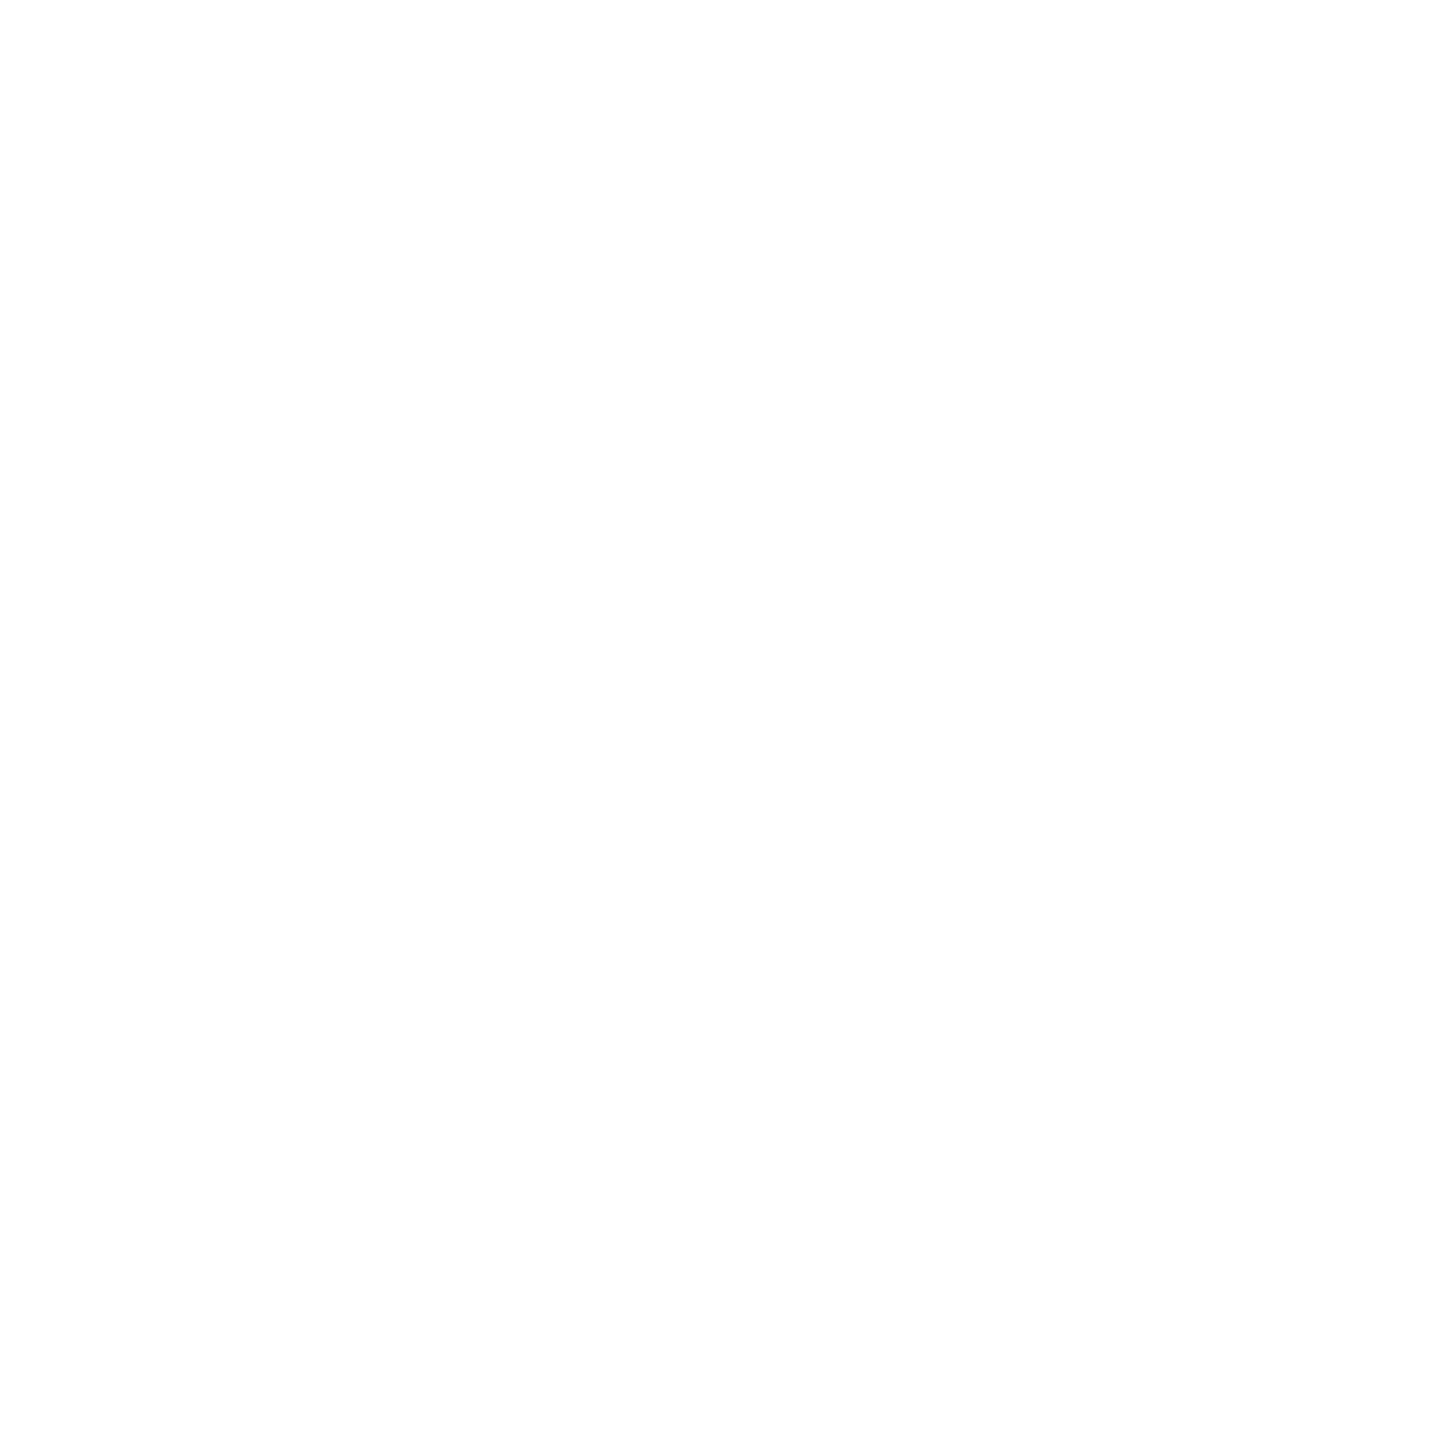

<IPython.core.display.Javascript object>


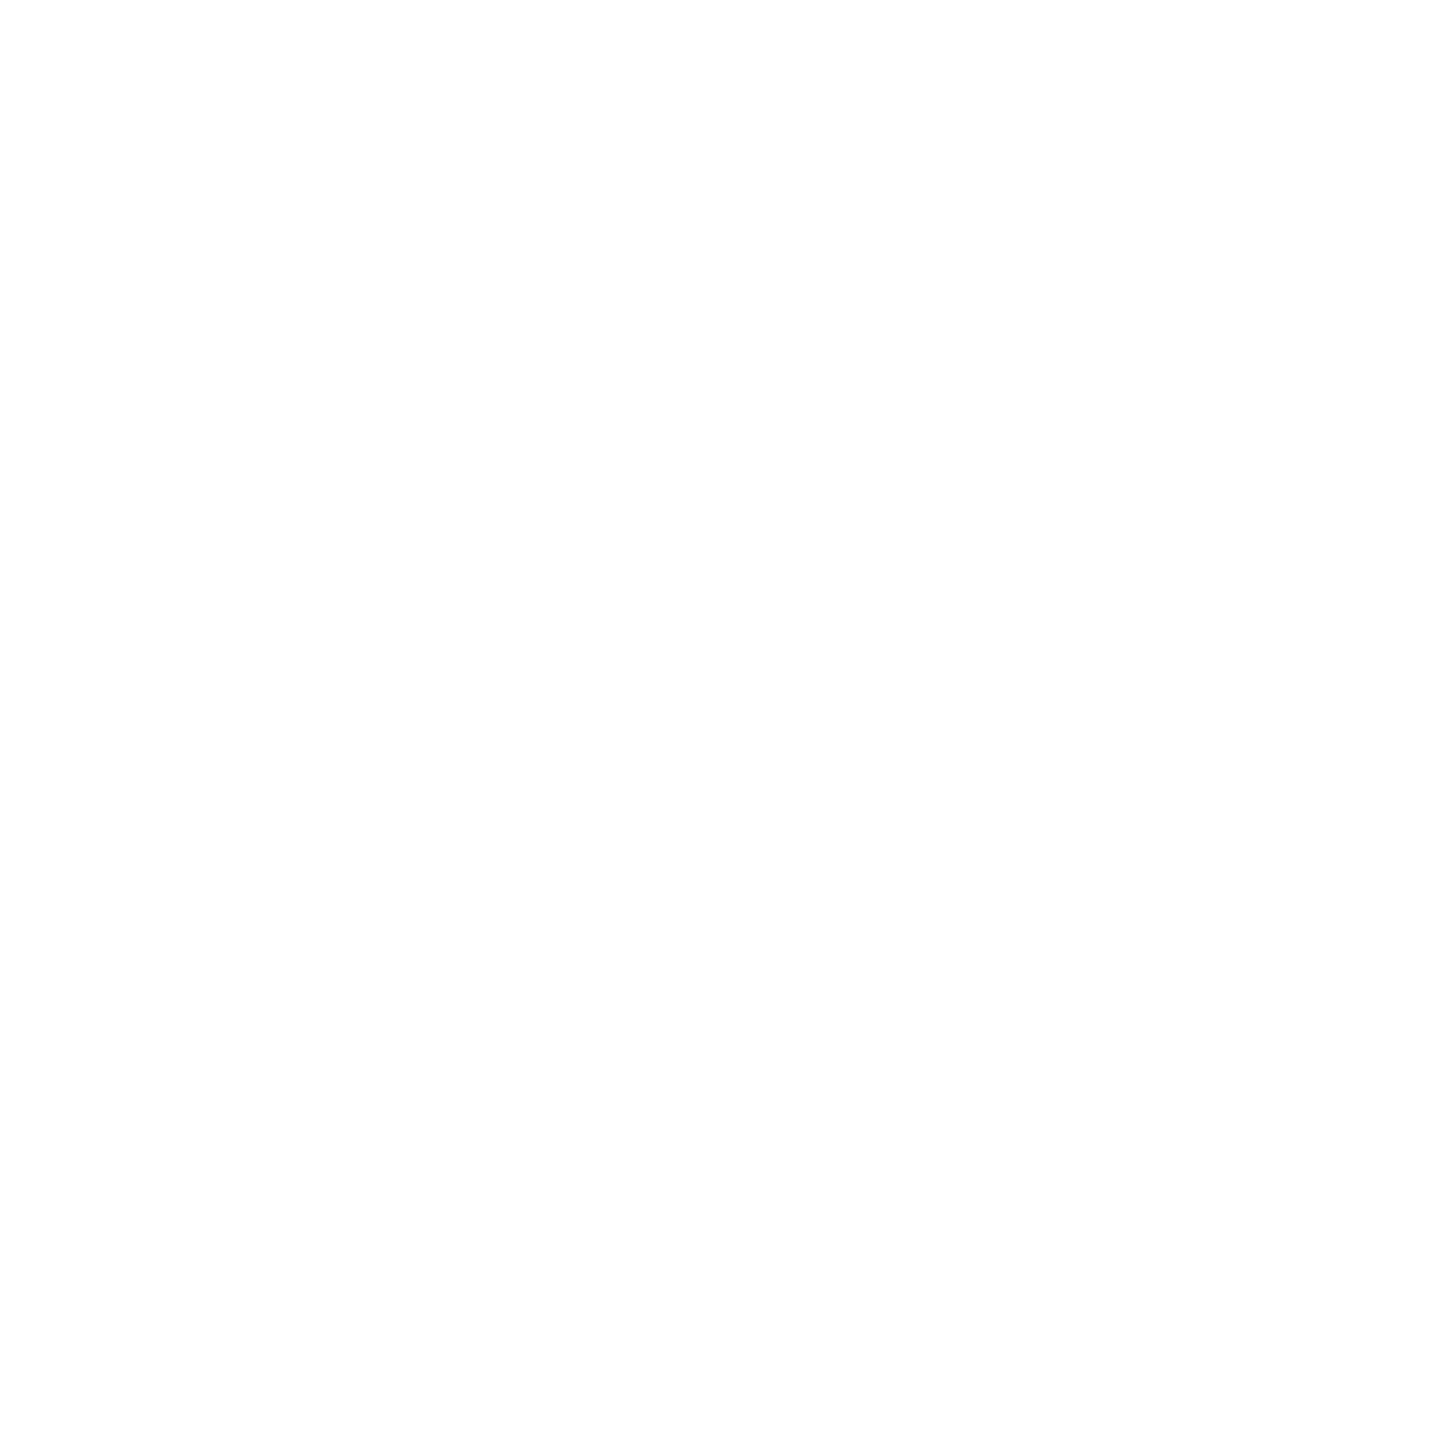

In [19]:
ims = []
fig = plt.figure(figsize=(20,20))
for n in range(imdata_array.shape[0]):
    im = plt.imshow(imdata_array[n,:,:], interpolation='nearest', animated=True)
    plt.clim(0, np.percentile(imdata_array.ravel(), 99.99))
    plt.title("{:.3f}".format(z_list[n]))
    ims.append([im])

In [20]:
ani = animation.ArtistAnimation(fig, ims, interval=50, blit = True,
                                repeat_delay=10)
from IPython.display import HTML
HTML(ani.to_html5_video())


In [32]:
ani.save("D:/Antipa/Zemax/Figs/lenslets_longer_POP_f=10_global_scale.mp4",fps=24,bitrate=12000)

In [22]:
np.save("D:/Antipa/Zemax/lenslets_longer_f=10_zstack_N=10",imdata_array)

In [23]:
np.save("D:/Antipa/Zemax/lenslets_longer_f=10_xinfo_N=10",np.asarray(dx))

In [24]:
np.save("D:/Antipa/Zemax/lenslets_longer_f=10_z_N=10",np.asarray(z_list))

In [ ]:
print(PopGrid.X(512)-PopGrid.X(513))